In [1]:
#
import pandas as pd

In [2]:
# load the dataset
df = pd.read_csv("heights.csv")
print(df.shape)
df.head()

(10000, 2)


,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


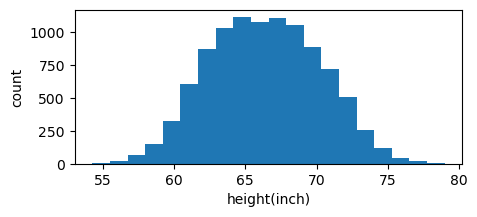

In [4]:
# import matplot library to plot if histogram is uniform distribution or not
# historgram without rwidth
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
plt.xlabel("height(inch)")
plt.ylabel("count")
plt.hist(df.height, bins=20)
plt.show()

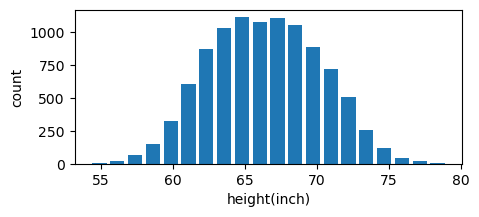

In [5]:
#  histogram with rwidth
plt.figure(figsize=(5,2))
plt.xlabel("height(inch)")
plt.ylabel("count")
plt.hist(df.height, bins=20, rwidth=0.8)
plt.show()

In [16]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

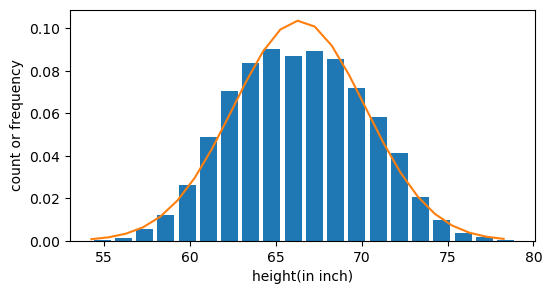

In [21]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as  np

plt.figure(figsize=(6,3))
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel("height(in inch)")
plt.ylabel("count or frequency")

rng = np.arange(min_height, max_height)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

plt.show()

In [23]:
# standard deviation and mean value of height
df.height.std(), df.height.mean()

(3.847528120795573, 66.367559754866)

In [17]:
# check for minimum and maximum value
min_height, max_height = df.height.min(), df.height.max()
min_height, max_height

(54.26313333, 78.99874235)

In [25]:
# set min_limit and max_limit for outlier
min_limit = df.height.mean() - 3* df.height.std()
max_limit = df.height.mean() + 3* df.height.std()
print("minimum limit: ",min_limit)
print("maximum limit: ",max_limit)

minimum limit:  54.824975392479274
maximum limit:  77.91014411725271


In [28]:
# let's see how many outlier we have
df[(df.height < min_limit) | (df.height > max_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [29]:
# filter out / remove the outliers form the dataset and kept the rest of the data
new_df = df[(df.height > min_limit) & (df.height < max_limit)]
new_df


,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [30]:
# lets compare the value of original and the new dataset to know how many rows are being remove or consider outlier
df.shape, new_df.shape

((10000, 2), (9993, 2))

In [32]:
# let's calculate z score and put it in new dataframe
df['z_score'] = (df.height - df.height.mean())/df.height.std()
df.head()

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


#[standard_deviation](zscore.png)  -- this is markdown image for standard deviation

<img src="zscore.png" alt="Resized Image" width="500">

In [35]:
# checking for z_score which lies below mean 
df[df['z_score'] <0]

,gender,height,z_score
9,Male,63.456494,-0.756607
12,Male,64.766329,-0.416171
17,Male,63.974326,-0.622019
22,Male,66.149132,-0.056771
38,Male,65.807316,-0.145611
...,...,...,...
9993,Female,60.030434,-1.647064
9994,Female,59.098250,-1.889345
9995,Female,66.172652,-0.050658
9997,Female,63.867992,-0.649655


In [36]:
# show all the outlier with their z_score value
# notice where i create z_score column/feature in the dataset, it not the new dataset 'new_df' but in the original dataset 'df'
# so we will we able to find the z_score value of outliers too
df[(df.z_score < -3) | (df.z_score > 3)]

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [ ]:
SSS